In [175]:
#import some necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
import math
import statsmodels.api as sms
from pandas import DataFrame

In [176]:
#import the data file
path = (r"C:\Users\Aarya Y Deshpande\Downloads\archive (3)\AirPassengers.csv")
df =pd.read_csv(path)
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
#convert from object to datetime
df['Month'] = pd.to_datetime(df['Month']) 
df = df.set_index(['Month'])

Shape of the data=  (144, 2)
Column datatypes= 
 Month          object
#Passengers     int64
dtype: object


In [177]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [178]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [179]:
#data about null values
df.isnull().sum()

#Passengers    0
dtype: int64

In [180]:
#drop the missing/null values
df=df.dropna()
df.count()

#Passengers    144
dtype: int64

In [181]:
print(df.isnull().sum())

#Passengers    0
dtype: int64


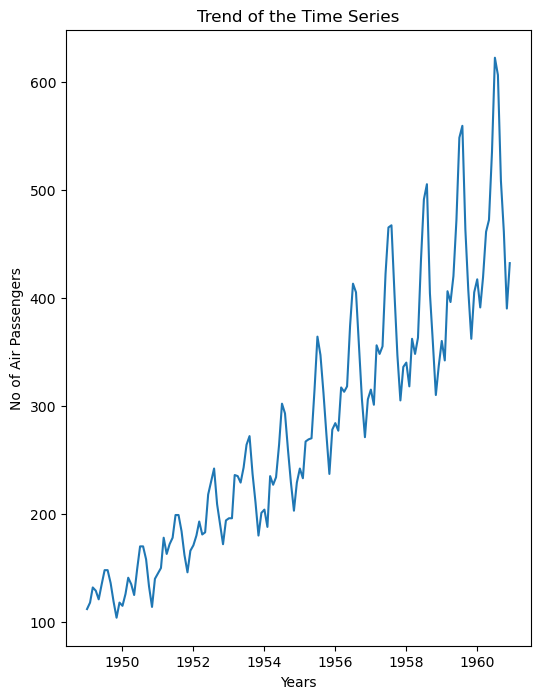

In [182]:
#a. Visualize the time series by plotting a graph
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')
plt.plot(df) 
#An upward trend is seen

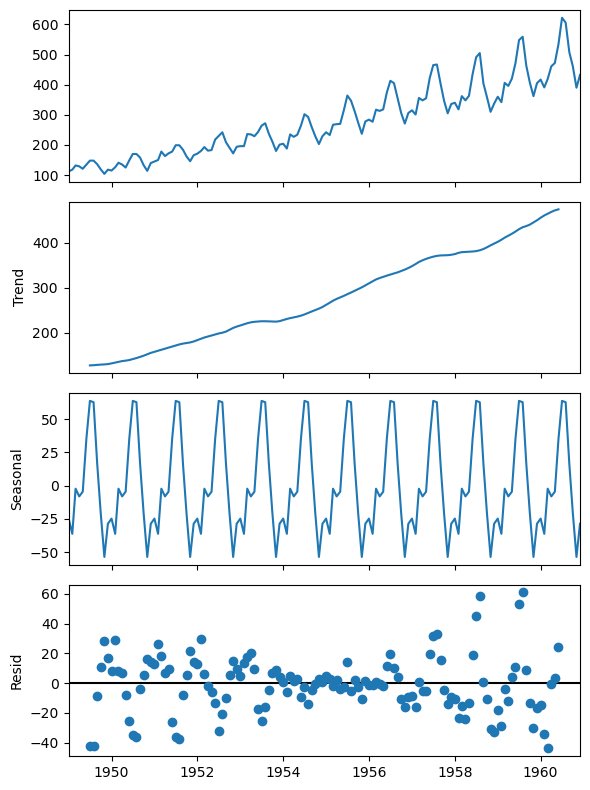

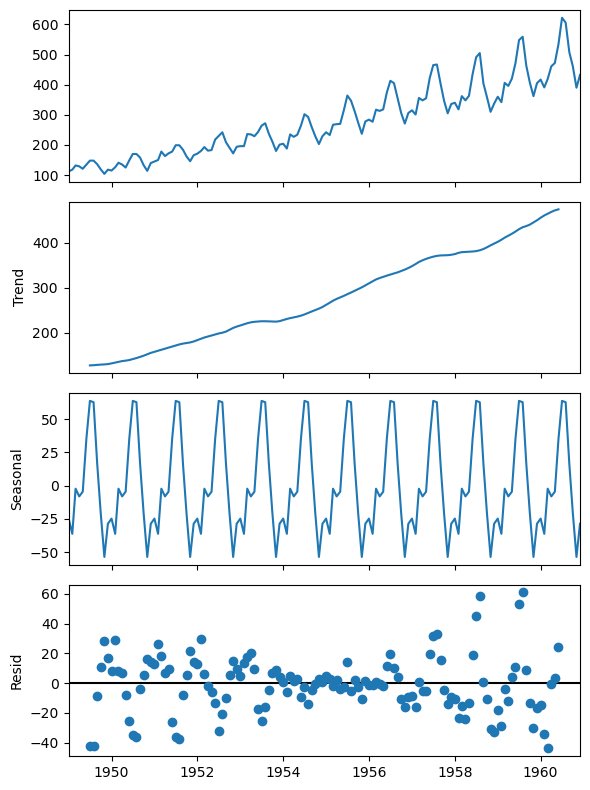

In [183]:
#b. Decompose the time series : Additive Decomposition
decompose= sm.tsa.seasonal_decompose(df,model ='additve') 
decompose.plot()


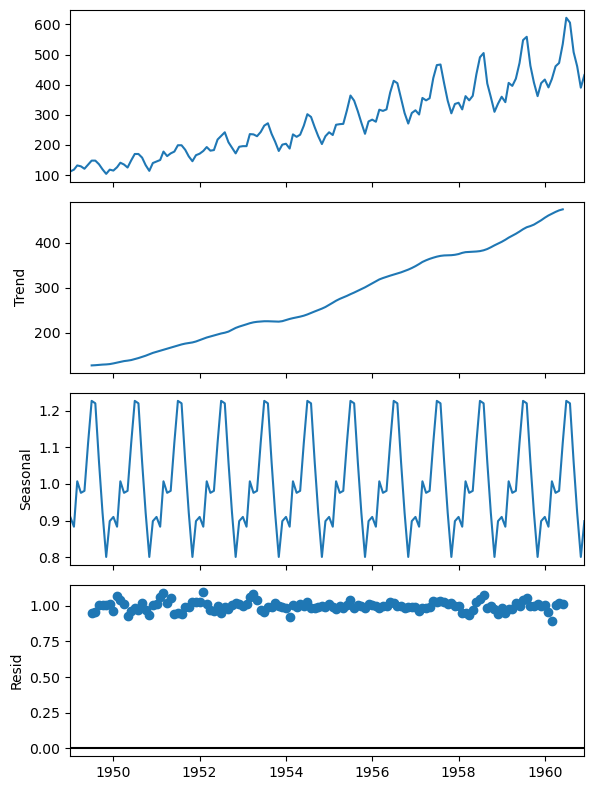

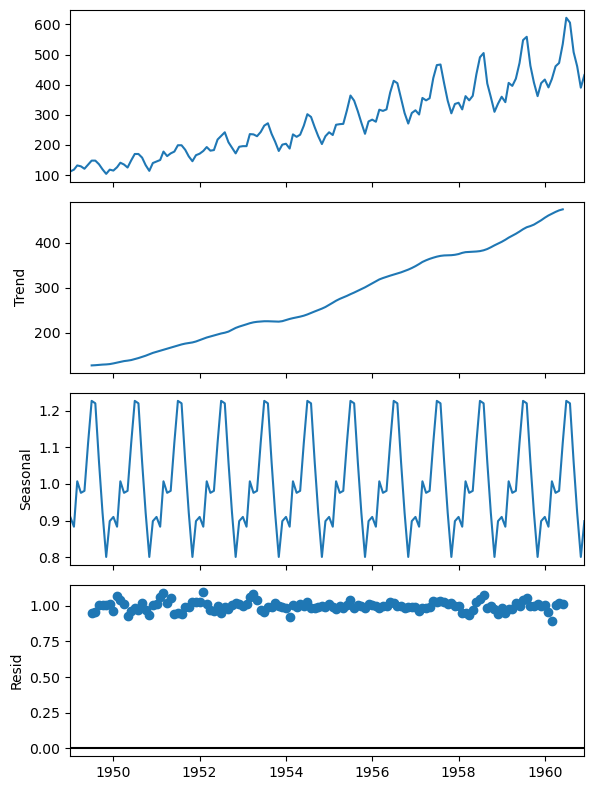

In [184]:
#Decompose the time series : Multiplicative Decomposition
decompose= sm.tsa.seasonal_decompose(df,model ='multiplicative') 
decompose.plot()
#An additive model is preferable for this time series because the seasonal variation is relatively comstant over time and the trend is increasinhg linearly. 


In [185]:
#drop the duplicates
df.shape
duplicate_rows=[df.duplicated()]
print("The number of duplicate rows is:",duplicate_rows)

The number of duplicate rows is: [Month
1949-01-01    False
1949-02-01    False
1949-03-01    False
1949-04-01    False
1949-05-01    False
              ...  
1960-08-01    False
1960-09-01    False
1960-10-01     True
1960-11-01    False
1960-12-01    False
Length: 144, dtype: bool]


In [186]:
df=df.drop_duplicates()
df.count()
df.head(7)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148


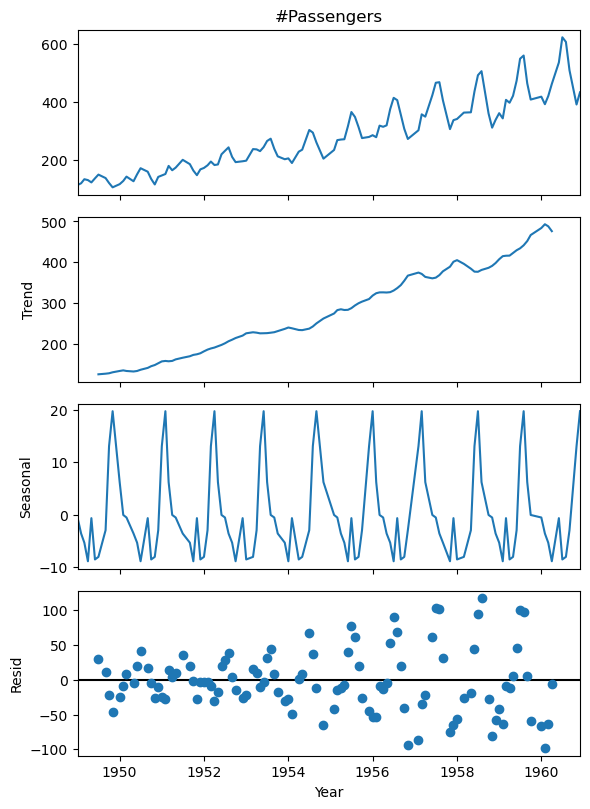

In [187]:
# Decompose seasonal data
S = 12 #seasonal period
decomp_results = seasonal_decompose(df['#Passengers'], period=S) 
#period: number of data points in each repeated cycle

# Plot decomposed data
plt.rcParams['figure.figsize'] = (6,8)
decomp_results.plot()
plt.xlabel('Year');